# Reflexer Model & Simulation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.plotting.backend = "plotly"

import sys
sys.path.append('./models/v1')

from models.v1.run import run

In [3]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = [
    'https://spreadsheets.google.com/feeds',
    'https://www.googleapis.com/auth/drive'
]

credentials = ServiceAccountCredentials.from_json_keyfile_name('credentials/spreadsheet-credentials.json', scope) # Your json file here
gc = gspread.authorize(credentials)

raw = gc.open('debt-price-test-data')
# gc.list_spreadsheet_files()

test_1 = raw.get_worksheet(0)

In [4]:
data = test_1.get_all_values()
headers = data.pop(0)
types = data.pop(0)

# debt_price_source_file = ''
# debt_price_dataframe = pd.read_csv(debt_price_source_file)
debt_price_dataframe = pd.DataFrame(data, columns=headers)
debt_price_dataframe.head()

timestamp seconds_passed    price_move
0  2020-09-07 11:31:58           5185  0.9993389888
1  2020-09-07 12:48:09           4571     1.0003479
2  2020-09-07 14:03:36           4527   0.998646148
3  2020-09-07 16:51:27          10071  0.9957287471
4  2020-09-07 18:29:18           5871  0.9954651836

In [5]:
debt_price_dataframe.copy().iloc[719]['seconds_passed']

'3900'

In [6]:
SIMULATION_TIMESTEPS = range(debt_price_dataframe.shape[0])
debt_price_dataframe.shape[0]

720

In [7]:
from models.v1.config import Config
import models.v1.options as options 

# Update parameter options
debt_price_source = options.DebtPriceSource.DEFAULT.value
update_params = {
    options.DebtPriceSource.__name__: [debt_price_source],
    options.IntegralType.__name__: [options.IntegralType.LEAKY.value],
}

env_processes = {}
if True: #debt_price_source == options.DebtPriceSource.EXTERNAL.value:
    env_processes = {
        'seconds_passed': lambda state, _sweep, _value, df=debt_price_dataframe.copy(): int(df.iloc[state['timestep'] - 1]['seconds_passed']),
        'price_move': lambda state, _sweep, _value, df=debt_price_dataframe.copy(): float(df.iloc[state['timestep'] - 1]['price_move']),
    }

# config = Config(M=update_params, T=SIMULATION_TIMESTEPS, env_processes=env_processes, merge_params=True)
config = Config(T=SIMULATION_TIMESTEPS, env_processes=env_processes)

In [8]:
data = run(clear_configs=True, config=config, drop_midsteps=True)

# compression_opts = dict(method='zip', archive_name='data.csv')  
# data.to_csv('data.zip', index=False, compression=compression_opts) 


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (720, 16, 1, 17)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 2.09s


In [9]:
df = data.copy()
df

index                error_star                 error_hat old_error_star  \
0        0                         0                         0              0   
1        6                         0   0.000557878364615938286              0   
2       12  -0.000200895129539173801  -0.000440028155084013796              0   
3       18   0.000136897310836222023  -0.000383051118106619023              0   
4       24   0.000053736791221066450  -0.000939441471771086937              0   
..     ...                       ...                       ...            ...   
716   4296   0.000283331281368333365   0.000659511869973357725              0   
717   4302   0.000017130614159897438   0.000646445377707510933              0   
718   4308  -0.000078250734123243780   0.000376886692657821124              0   
719   4314  -0.000108718685042484867  -0.000661429684670945317              0   
720   4320   0.000155744576665338559   0.000063707194267257261              0   

    old_error_hat error_star_integral          error_hat_integral  \
0               0                   0                           0   
1               0                   0     1.004181056308688915409   
2               0                   0     1.309707724520203015643   
3               0                   0    -0.571439954356988418383   
4               0                   0    -3.564901931545175985626   
..            ...                 ...                         ...   
716             0                   0  -749.689267273453806902949   
717             0                   0  -747.057110440753016230696   
718             0                   0  -744.974629677559565604067   
719             0                   0  -745.581844422515572749321   
720             0                   0  -746.864556886921887435769   

        error_star_derivative      error_hat_derivative  \
0                           0                         0   
1                           0                         0   
2    -0.000000038745444462724  -0.000000038745444462724   
3     0.000000073899024365651   0.000000073899024365651   
4    -0.000000018369896093476  -0.000000018369896093476   
..                        ...                       ...   
716  -0.000000069006117650550  -0.000000069006117650550   
717  -0.000000066038369438982  -0.000000066038369438982   
718  -0.000000023435220708413  -0.000000023435220708413   
719  -0.000000007138695154484  -0.000000007138695154484   
720   0.000000061617721739900   0.000000061617721739900   

                  target_rate  ... timedelta                  timestamp  \
0                           0  ...         0 2020-09-07 18:50:40.274981   
1                           0  ...      3600 2020-09-07 19:50:40.274981   
2     0.000000013951050662419  ...      5185 2020-09-07 21:17:05.274981   
3    -0.000000009506757696982  ...      4571 2020-09-07 22:33:16.274981   
4    -0.000000003731721612547  ...      4527 2020-09-07 23:48:43.274981   
..                        ...  ...       ...                        ...   
716  -0.000000019675783428376  ...      5475 2020-10-17 12:17:14.274981   
717  -0.000000001189625983334  ...      4031 2020-10-17 13:24:25.274981   
718   0.000000005434078758585  ...      4070 2020-10-17 14:32:15.274981   
719   0.000000007549908683532  ...      4268 2020-10-17 15:43:23.274981   
720  -0.000000010815595601738  ...      4292 2020-10-17 16:54:55.274981   

    blockheight  seconds_passed price_move  simulation  subset  run  substep  \
0             0               0   1.000000           0       0    1        0   
1           240            5185   0.999339           0       0    1        6   
2           585            4571   1.000348           0       0    1        6   
3           889            4527   0.998646           0       0    1        6   
4          1190           10071   0.995729           0       0    1        6   
..          ...             ...        ...         ...     ...  ...      ...   
716      228497            4031  

In [10]:
FXcols = [
    'error_star',
    'error_hat',
    'old_error_star',
    'old_error_hat',
    'error_star_integral',
    'error_hat_integral',
    'error_star_derivative',
    'error_hat_derivative',
    'target_rate',
    'target_price',
    'market_price',
    'debt_price'
]

In [11]:
for c in FXcols:
    print(c)
    df[c] = df[c].apply(lambda x: float(x))

error_star
error_hat
old_error_star
old_error_hat
error_star_integral
error_hat_integral
error_star_derivative
error_hat_derivative
target_rate
target_price
market_price
debt_price


In [12]:
df['target_rate_hourly'] = df.target_rate * 3600
df['error_star_derivative_scaled'] = df.error_star_derivative * 3600
df['error_hat_derivative_scaled'] = df.error_star_derivative * 3600

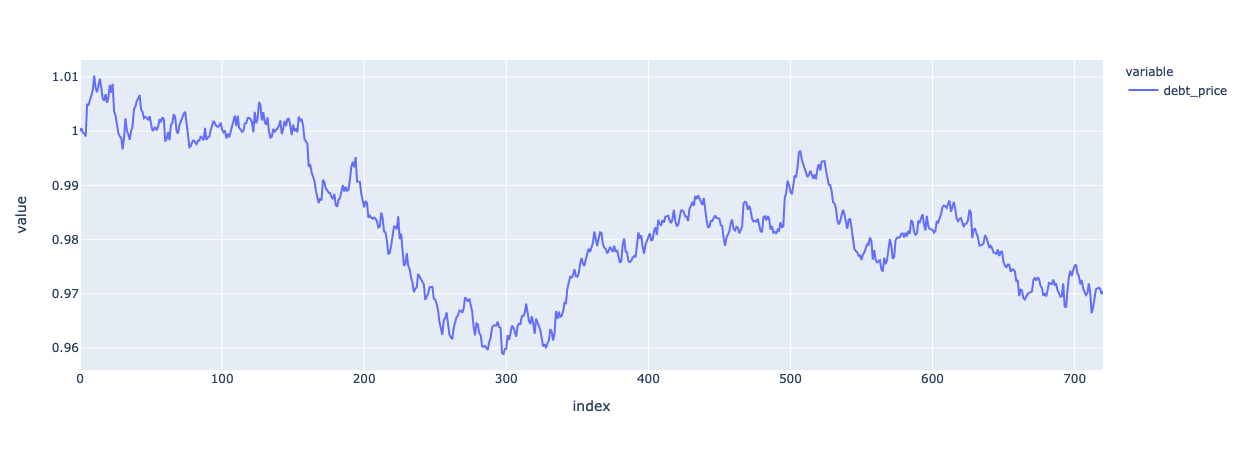

In [13]:
df.debt_price.plot()

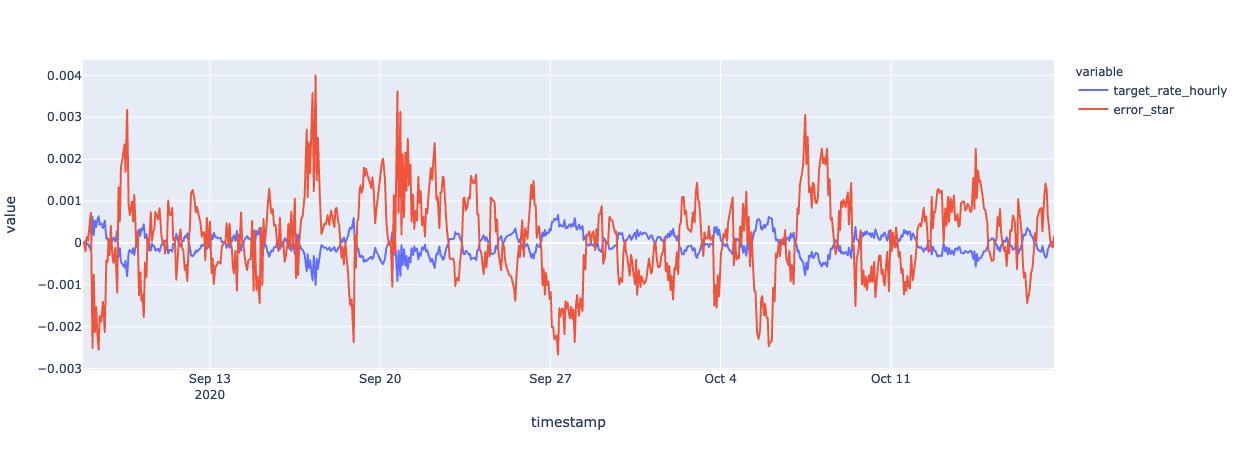

In [14]:
df.plot(kind='line', x='timestamp', y=['target_rate_hourly', 'error_star'])

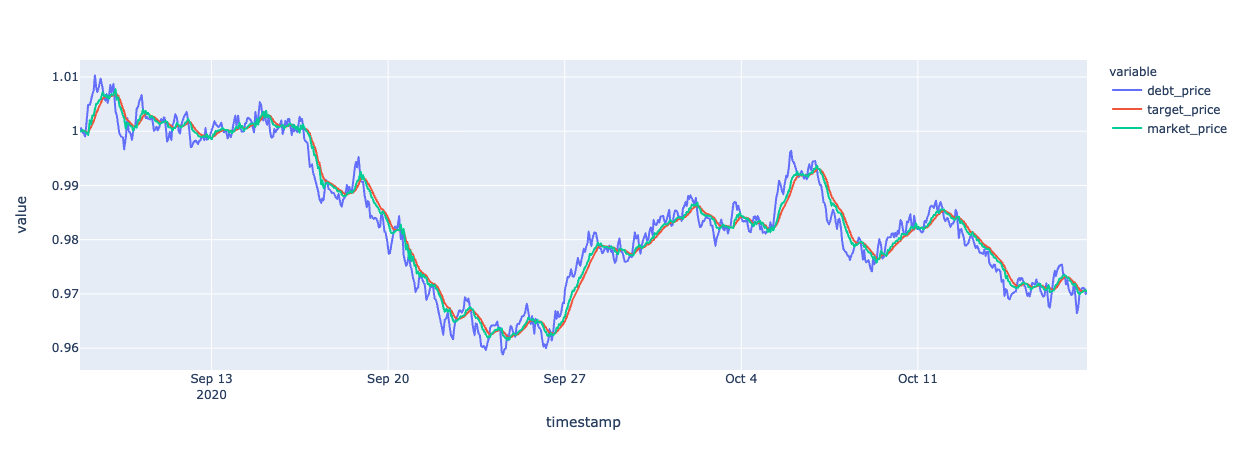

In [15]:
df.plot(kind='line', x='timestamp', y=['debt_price', 'target_price', 'market_price'])

In [16]:
def integral_plot(df):
    from matplotlib.patches import Rectangle

    df['seconds'] = df.timedelta.cumsum()


    x=df.seconds.values
    y=df.error_star.values
    h=(df.error_star.shift(periods=-1)+df.error_star)/2
    w=df.timedelta.values

    plt.figure(figsize=(18, 12))
    plt.plot(x,y , marker='.',linestyle='--', color='r')

    ax = plt.gca()

    for p in range(len(x)-1):
        ax.add_patch(
            Rectangle(
            (x[p], 0),
            w[p+1],
            h[p+1],
            edgecolor = 'blue',
            facecolor = 'cyan',
            fill=True
        ) )

    plt.title('Visualizing Numerical Integration')
    plt.xlabel('Time passed in seconds')
    plt.ylabel('Observed Error')

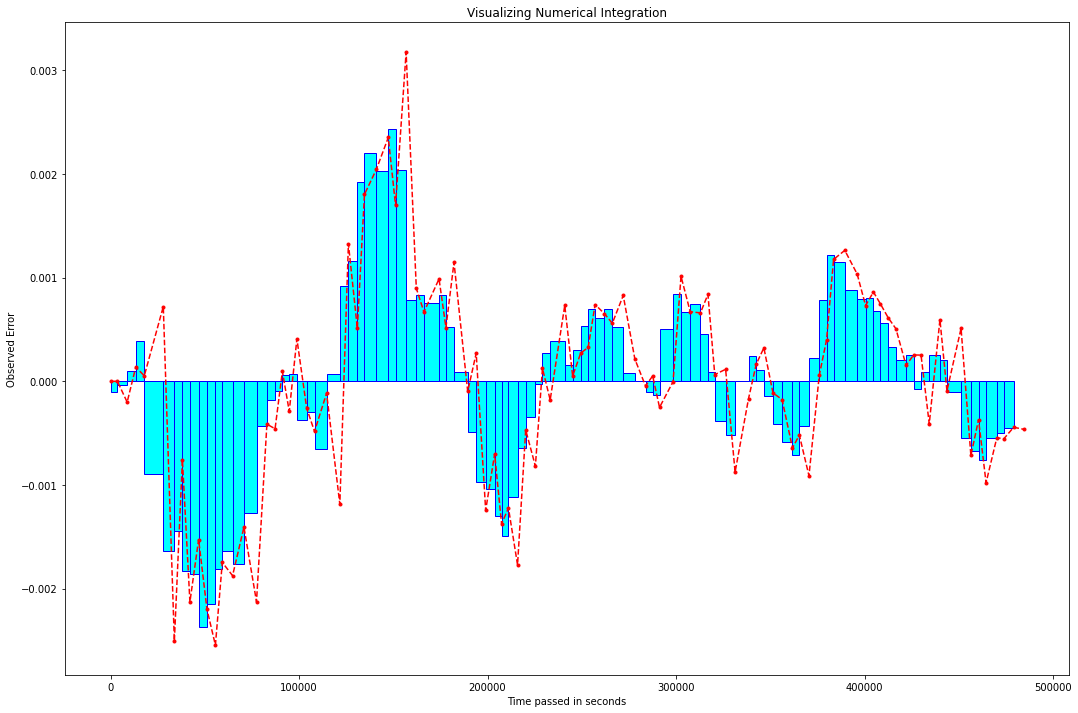

In [17]:
integral_plot(df[df.timestep<100])

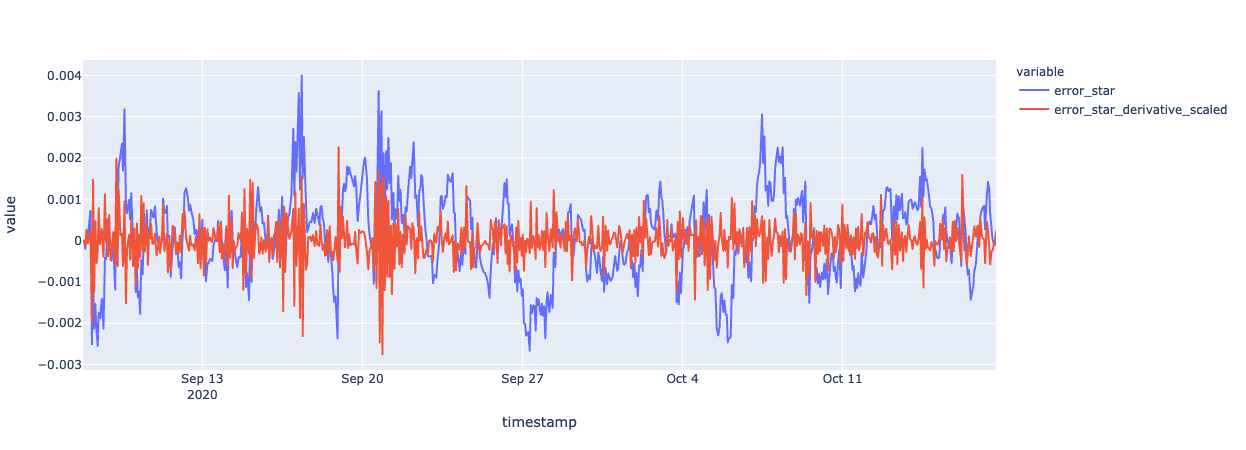

In [18]:
df.plot(kind='line', x='timestamp', y=['error_star','error_star_derivative_scaled'])

Plotly `hist()` error, see: https://github.com/plotly/plotly.py/pull/2713

In [19]:
df.timedelta.apply(lambda x: x/3600).hist()

TypeError: histogram() got an unexpected keyword argument 'legend'

In [ ]:
df.error_star.hist()

In [ ]:
import seaborn as sns; sns.set(style="white", color_codes=True)

In [ ]:
g = sns.jointplot(x="error_hat", y="error_star", alpha=.3, data=df)

In [ ]:
3600**2